# Measurement Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cmaps
import math

In [3]:
df = pd.read_csv("perf_test_cuda_257136.csv")
df.head()

,Size,NUM_STREAMS,Time
0,8,1,0.000038
1,8,2,0.000042
2,8,4,0.000053
3,8,8,0.000072
4,32,1,0.000038


In [4]:
sub_df1 = df[df['Size'] == 8]
sub_df2 = df[df['Size'] == 512]
print(sub_df2)

    Size  NUM_STREAMS      Time
18   512            1  0.000038
19   512            2  0.000042
20   512            4  0.000051
21   512            8  0.000073
22   512           16  0.000116
23   512           32  0.000193
24   512           64  0.000355
25   512          128  0.000691
26   512          256  0.001341
27   512          512  0.002613


## time vs number of streams

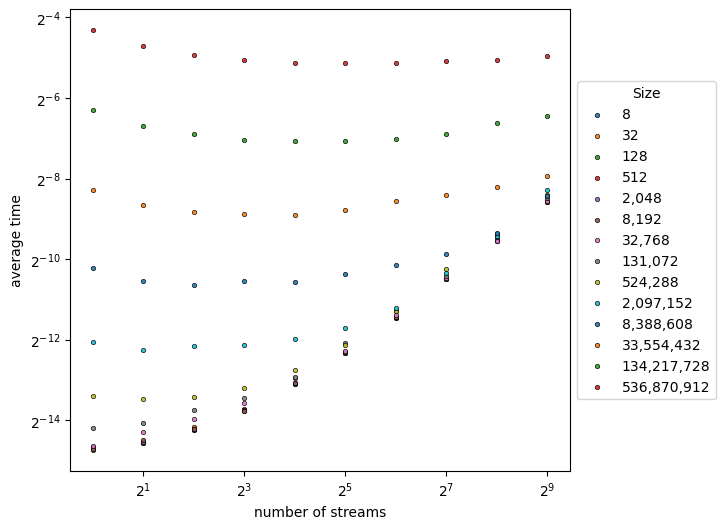

In [6]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    sub_df = df[df['Size'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

for size <= 131072 (2^19) no runtime improvement by using streams

In [7]:
numstreams

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int64)

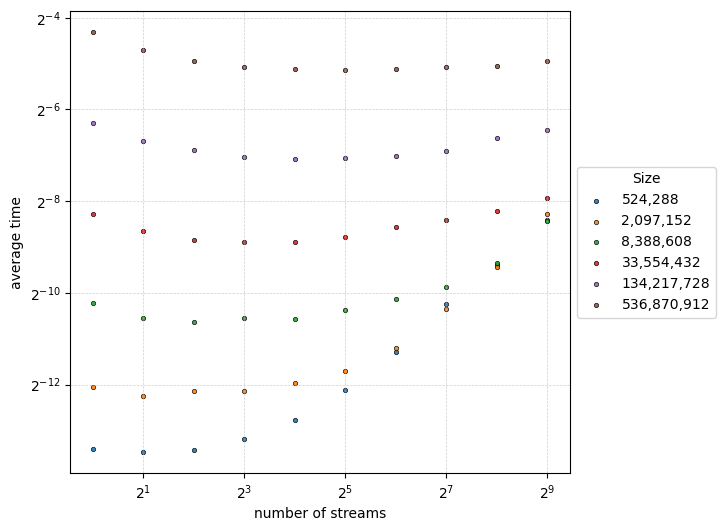

In [8]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(sizes):
    if size > 131072:
        sub_df = df[df['Size'] == size]
        #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
        plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
plt.xlabel('number of streams')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.savefig('cuda_scaling.pdf', bbox_inches='tight')
plt.show()

for 524288/2^19 and  only 2 streams are beneficial


In [9]:
math.log2(524288)
math.log2(536870912)

29.0

## time vs array size

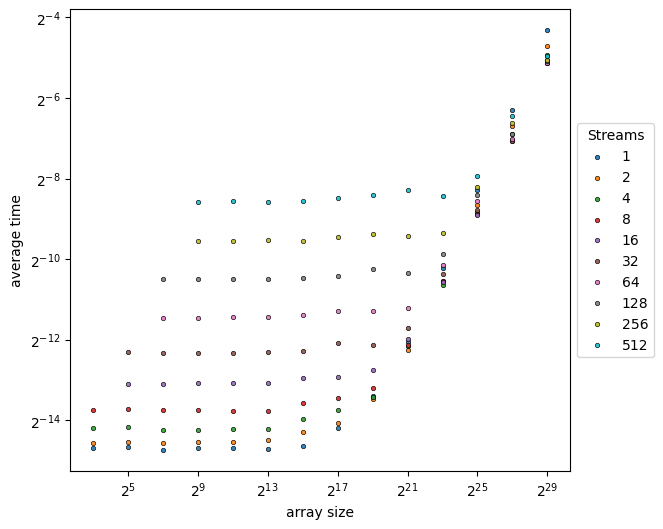

In [12]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
plt.xlabel('array size')
plt.ylabel('average time')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Text(0, 0.5, 'average time')

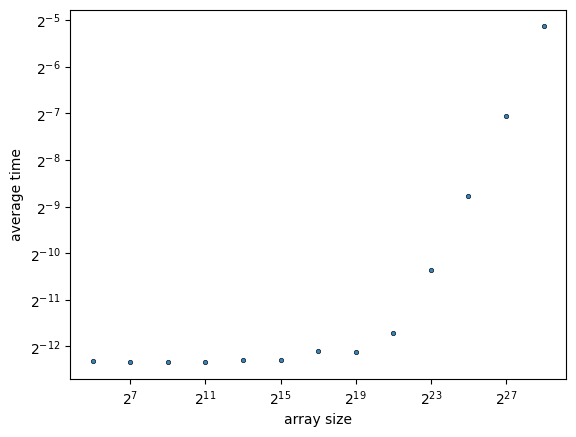

In [20]:
sub_df = df[df['NUM_STREAMS'] == 32]
#plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
plt.scatter(sub_df['Size'], sub_df['Time'],
            label=f'{size:,}',  # Adds thousands separators
            s=10,  # Larger dots
            alpha=0.9,  # Slight transparency
            edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
plt.xlabel('array size')
plt.ylabel('average time')

## time per value vs array size

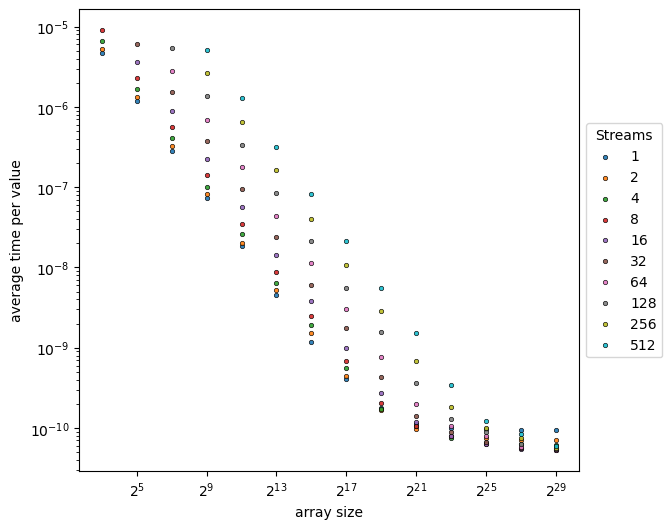

In [16]:
sizes = df['Size'].unique()
numstreams = df['NUM_STREAMS'].unique()

plt.figure(figsize=(8, 6)) 

for idx, size in enumerate(numstreams):
    sub_df = df[df['NUM_STREAMS'] == size]
    #plt.scatter(sub_df['NUM_STREAMS'], sub_df['Time'], label=f'Size: {size}')
    plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)

plt.xscale('log', base = 2)
#plt.yscale('log', base = 2)
plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Streams')

# Add space on the right for the legend
plt.subplots_adjust(right=0.75)

plt.show()

Text(0, 0.5, 'average time per value')

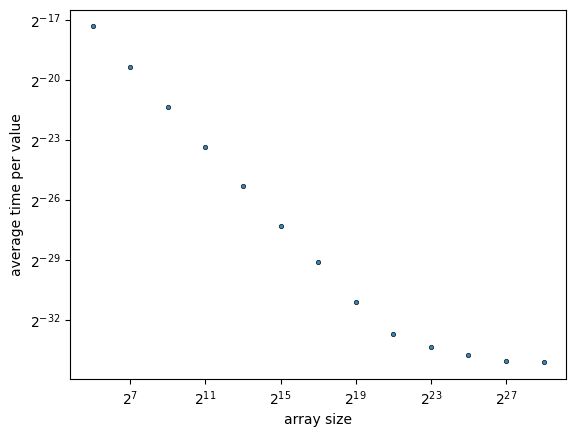

In [21]:
sub_df = df[df['NUM_STREAMS'] == 32]
plt.scatter(sub_df['Size'], sub_df['Time']/sub_df['Size'],
                label=f'{size:,}',  # Adds thousands separators
                s=10,  # Larger dots
                alpha=0.9,  # Slight transparency
                edgecolor='black', linewidth=0.5)
plt.xscale('log', base = 2)
plt.yscale('log', base = 2)
#plt.yscale('log')
plt.xlabel('array size')
plt.ylabel('average time per value')